In [46]:
# eliminar colunas com pouca correlacao
# engenhocar outras
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cane
from sklearn.preprocessing import MinMaxScaler
%run -i create_target.py
#https://towardsdatascience.com/data-normalization-with-pandas-and-scikit-learn-7c1cc6ed6475
#https://pbpython.com/categorical-encoding.html

In [47]:
#df = pd.read_csv("data/00-merged.csv")
#df = pd.read_csv("data/02-outliers-aiq.csv")
df = pd.read_csv("dados/03-outliers-zscore15.csv")
df.head(5)

,week_number,sales_depot_id,sales_channel_id,route_id,client_id,product_id,town,state,client_name,short_name,brand,weight,pieces,target
0,6,1310,1,2005,32695,43066,2260 GONZALEZ GALLO,JALISCO,MARIA GRACIELA ROCHA GUTIERREZ,Pay Pina,MLA,85.0,1.0,0.0
1,3,2029,1,1126,1048394,1309,2161 IRAPUATO GUADALUPE,GUANAJUATO,ARACELI ESTRADA PALATO,Bimbunuelos,BIM,66.0,4.0,0.0
2,4,2022,1,1221,2036290,1278,2152 ALTAMIRANO_BM,GUERRERO,EULOGIA,Nito,BIM,62.0,1.0,1.0
3,4,4041,1,1054,153108,5707,2368 TAMPICO BIMBO,TAMAULIPAS,ENCINO 2,Tostada Ondulada Tubo,MR,360.0,30.0,0.0
4,6,1116,1,1058,115369,1146,2011 AG. SAN ANTONIO,"MÉXICO, D.F.",LAS FLORES,Pan Integral,BIM,675.0,unknown,0.0


# feature selection and preparation

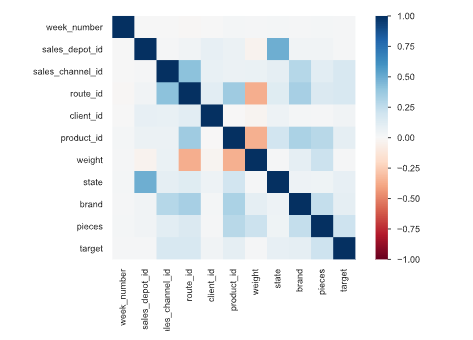

 - ## week_number

low correlation to target. remove

In [5]:
dfe = df.drop(columns=['week_number'])

 - ## sales_depot_id

low correlation to target. remove

In [6]:
dfe = dfe.drop(columns=['sales_depot_id'])

 - ## sales_channel_id

some correlation to target. we investigate

In [ ]:
dfe['sales_channel_id'].describe()

In [ ]:
dfe.groupby('sales_channel_id').size()/dfe['sales_channel_id'].count()

we keep, with IDF

In [8]:
dfe = cane.idf(dfe, n_coresJob=2,disableLoadBar = False, columns_use = ["sales_channel_id"]) # specific columns

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

 - ## client_id

moved to the end

 - ## route_id

some correlation. 2103 examples with frequency lower than 1% for all of them. we use idf:

In [ ]:
dfe['route_id'].describe()

In [ ]:
dfe.groupby('route_id').size()/dfe['route_id'].max()

In [9]:
dfe = cane.idf(dfe, n_coresJob=2,disableLoadBar = False, columns_use = ["route_id"]) # specific columns

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

- ## product_id

some correlation. idf again

In [ ]:
dfe['product_id'].describe()

In [ ]:
dfe.groupby('product_id').size()/dfe['product_id'].count()

In [11]:
dfe = cane.idf(dfe, n_coresJob=2,disableLoadBar = False, columns_use = ["product_id"]) # specific columns

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

- ## town

IDF

In [12]:
dfe = cane.idf(dfe, n_coresJob=2,disableLoadBar = False, columns_use = ["town"]) # specific columns

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
dfe.head()

- ## state

moderately small number of unique values mean we can use one hot encoding here
- https://pbpython.com/categorical-encoding.html

In [ ]:
dfe['state'].describe()

In [ ]:
dfe.groupby('state').size()/dfe['state'].count()

In [13]:
# cell by paulobarros
dfe.loc[dfe['state'] == "SAN LUIS POTOSÍ", 'state'] = "Top11-21"
dfe.loc[dfe['state'] == "BAJA CALIFORNIA SUR", 'state'] = "Top22-32"
dfe.loc[dfe['state'] == "NAYARIT", 'state'] = "Top22-32"
dfe.loc[dfe['state'] == "COLIMA", 'state'] = "Top22-32"
dfe.loc[dfe['state'] == "QUINTANA ROO", 'state'] = "Top22-32"
dfe.loc[dfe['state'] == "TLAXCALA", 'state'] = "Top22-32"
dfe.loc[dfe['state'] == "CAMPECHE", 'state'] = "Top22-32"
dfe.loc[dfe['state'] == "Queretaro de Arteaga", 'state'] = "Top22-32"
dfe.loc[dfe['state'] == "QUERETARO", 'state'] = "Top22-32"
dfe.loc[dfe['state'] == "ESTADO DE MÉXICO", 'state'] = "Top10"
dfe.loc[dfe['state'] == "MÉXICO, D.F.", 'state'] = "Top10"
dfe.loc[dfe['state'] == "JALISCO", 'state'] = "Top10"
dfe.loc[dfe['state'] == "PUEBLA", 'state'] = "Top10"
dfe.loc[dfe['state'] == "VERACRUZ", 'state'] = "Top10"
dfe.loc[dfe['state'] == "GUANAJUATO", 'state'] = "Top10"
dfe.loc[dfe['state'] == "NUEVO LEÓN", 'state'] = "Top10"
dfe.loc[dfe['state'] == "MICHOACÁN", 'state'] = "Top10"
dfe.loc[dfe['state'] == "HIDALGO", 'state'] = "Top11-21"
dfe.loc[dfe['state'] == "TAMAULIPAS", 'state'] = "Top11-21"
dfe.loc[dfe['state'] == "CHIHUAHUA", 'state'] = "Top11-21"
dfe.loc[dfe['state'] == "COAHUILA", 'state'] = "Top11-21"
dfe.loc[dfe['state'] == "BAJA CALIFORNIA NORTE", 'state'] = "Top22-32"
dfe.loc[dfe['state'] == "OAXACA", 'state'] = "Top10"
dfe.loc[dfe['state'] == "SONORA", 'state'] = "Top11-21"
dfe.loc[dfe['state'] == "GUERRERO", 'state'] = "Top11-21"
dfe.loc[dfe['state'] == "SINALOA", 'state'] = "Top11-21"
dfe.loc[dfe['state'] == "MORELOS", 'state'] = "Top22-32"
dfe.loc[dfe['state'] == "ZACATECAS", 'state'] = "Top22-32"
dfe.loc[dfe['state'] == "DURANGO", 'state'] = "Top22-32"
dfe.loc[dfe['state'] == "YUCATÁN", 'state'] = "Top11-21"
dfe.loc[dfe['state'] == "CHIAPAS", 'state'] = "Top10"
dfe.loc[dfe['state'] == "AGUASCALIENTES", 'state'] = "Top22-32"
dfe.loc[dfe['state'] == "TABASCO", 'state'] = "Top11-21"
dfe.loc[dfe['state'] == "SAN LUIS POTOSÍ", 'state'] = "Top11-21"

In [14]:
# one hot encoding
dfe = pd.get_dummies(dfe, columns=["state"])
dfe.head()

,town,product_id,route_id,sales_channel_id,client_name,short_name,brand,weight,pieces,target,state_Top10,state_Top11-21,state_Top22-32
0,5.048567,5.528601,6.266273,0.084117,MARIA GRACIELA ROCHA GUTIERREZ,Pay Pina,MLA,85.0,1.0,0.0,1,0,0
1,5.819874,4.046264,6.279286,0.084117,ARACELI ESTRADA PALATO,Bimbunuelos,BIM,66.0,4.0,0.0,1,0,0
2,5.936488,3.999277,5.322155,0.084117,EULOGIA,Nito,BIM,62.0,1.0,1.0,0,1,0
3,5.381851,7.007199,6.236371,0.084117,ENCINO 2,Tostada Ondulada Tubo,MR,360.0,30.0,0.0,0,1,0
4,4.610699,3.905971,6.392524,0.084117,LAS FLORES,Pan Integral,BIM,675.0,unknown,0.0,1,0,0


- ## client_name

In [ ]:
dfe['client_name'].describe()

In [ ]:
dfe.groupby('client_name').size()/dfe['client_name'].count()

treatment by paulobaros

In [15]:
dfe["client_name"] = dfe["client_name"].str.upper() 

In [16]:
# Let's also generate a list of individual word frequency across all names
def tfidf_score_list(vf2, list_len):
    from sklearn.feature_extraction.text import TfidfVectorizer
    v = TfidfVectorizer()

    vf2['New'] = 'na'
    a = " ".join(vf2['client_name'])
    vf2['New'][0] = a

    tfidf = v.fit_transform(vf2['New'])

    feature_names = v.get_feature_names()

    freq = []
    doc = 0
    feature_index = tfidf[doc,:].nonzero()[1]
    tfidf_scores = zip(feature_index, [tfidf[doc, x] for x in feature_index])
    for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
            freq.append((w.encode('utf-8'),s))
    
    del vf2['New']
    
    import numpy as np
    names = ['word','score']
    formats = ['S50','f8']
    dtype = dict(names = names, formats=formats)
    array = np.array(freq, dtype=dtype)

    b = np.sort(array, order='score')
    
    if list_len > len(b)+1:
        list_len = len(b)+1
    for i in range(1,list_len):
        print(b[-i])

In [17]:
tfidf_score_list(dfe, 200)

C:\Users\onuno\AppData\Local\Temp\ipykernel_5384\3120655420.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vf2['New'][0] = a
E:\Programas\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(b'no', 0.62882986)
(b'identificado', 0.62437851)
(b'la', 0.29985552)
(b'el', 0.15864173)
(b'abarrotes', 0.15351015)
(b'de', 0.10475078)
(b'super', 0.10274375)
(b'oxxo', 0.09566867)
(b'maria', 0.07325491)
(b'los', 0.05362932)
(b'san', 0.0516036)
(b'miscelanea', 0.05129712)
(b'del', 0.04129559)
(b'mini', 0.03934461)
(b'jose', 0.037659)
(b'garcia', 0.03680312)
(b'lupita', 0.03488204)
(b'hernandez', 0.03441112)
(b'gonzalez', 0.0319967)
(b'martinez', 0.03009058)
(b'lopez', 0.02846103)
(b'las', 0.02668572)
(b'don', 0.02615499)
(b'rodriguez', 0.02579619)
(b'casa', 0.0232248)
(b'juan', 0.0222082)
(b'mary', 0.02128877)
(b'ramirez', 0.0208926)
(b'jesus', 0.02020116)
(b'guadalupe', 0.02010025)
(b'farmacia', 0.01958074)
(b'hermanos', 0.01952468)
(b'sanchez', 0.01927053)
(b'perez', 0.01883324)
(b'ii', 0.01845575)
(b'mi', 0.01841464)
(b'cremeria', 0.01782412)
(b'flores', 0.01690095)
(b'cruz', 0.01633659)
(b'luis', 0.01551808)
(b'torres', 0.01517423)
(b'tienda', 0.01386237)
(b'rosa', 0.01367176)
(b'

In [18]:
print(dfe[dfe['client_name'].str.contains('.*CAFE.*')])

            town  product_id   route_id  sales_channel_id  \
287     4.996077    3.905971   7.509804          4.382394   
1023    4.610699    6.271345   8.921766          4.768273   
1092    4.859119    6.963363   6.083858          0.084117   
1327    5.126187    9.818254   8.929798          5.575095   
2445    4.610699    6.255650  10.859708          4.768273   
...          ...         ...        ...               ...   
932071  4.996077    3.664771  10.572026          5.575095   
932248  5.843533    5.067711   6.775601          0.084117   
933273  5.163547    4.838280   7.060481          0.084117   
934806  6.781230    7.207608   5.318445          0.084117   
934959  4.524851    4.838280   8.312001          0.084117   

                                              client_name  \
287                                     PLAUCHU CAFETERIA   
1023                              CAFETERIA RADIO FORMULA   
1092                            SDN CAFETERIA TRANSPORTES   
1327                   

In [19]:
# --- Begin Filtering for specific terms

# Note that the order of filtering is significant.
# For example: 
# The regex of .*ERIA.* will assign "FRUITERIA" to 'Eatery' rather than 'Fresh Market'.
# In other words, the first filters to occur have a bigger priority.

def filter_specific(vf2):
    
    # Known Large Company / Special Group Types
    vf2['client_name'] = vf2['client_name'].str.replace('.*REMISION.*','Consignment')
    vf2['client_name'] = vf2['client_name'].replace(['.*WAL MART.*','.*SAMS CLUB.*'],'Walmart', regex=True)
    vf2['client_name'] = vf2['client_name'].str.replace('.*OXXO.*','Oxxo Store')
    vf2['client_name'] = vf2['client_name'].str.replace('.*CONASUPO.*','Govt Store')
    vf2['client_name'] = vf2['client_name'].str.replace('.*BIMBO.*','Bimbo Store')

    

    # General term search for a random assortment of words I picked from looking at
    # their frequency of appearance in the data and common spanish words for these categories
    vf2['client_name'] = vf2['client_name'].replace(['.*COLEG.*','.*UNIV.*','.*ESCU.*','.*INSTI.*',\
                                                        '.*PREPAR.*'],'School', regex=True)
    vf2['client_name'] = vf2['client_name'].str.replace('.*PUESTO.*','Post')
    vf2['client_name'] = vf2['client_name'].replace(['.*FARMA.*','.*HOSPITAL.*','.*CLINI.*'],'Hospital/Pharmacy', regex=True)
    vf2['client_name'] = vf2['client_name'].replace(['.*CAFE.*','.*CREMERIA.*','.*DULCERIA.*',\
                                                        '.*REST.*','.*BURGER.*','.*TACO.*', '.*TORTA.*',\
                                                        '.*TAQUER.*','.*HOT DOG.*',\
                                                        '.*COMEDOR.*', '.*ERIA.*','.*BURGU.*'],'Eatery', regex=True)
    vf2['client_name'] = vf2['client_name'].str.replace('.*SUPER.*','Supermarket')
    vf2['client_name'] = vf2['client_name'].replace(['.*COMERCIAL.*','.*BODEGA.*','.*DEPOSITO.*',\
                                                            '.*ABARROTES.*','.*MERCADO.*','.*CAMBIO.*',\
                                                        '.*MARKET.*','.*MART .*','.*MINI .*',\
                                                        '.*PLAZA.*','.*MISC.*','.*ELEVEN.*','.*EXP.*',\
                                                         '.*SNACK.*', '.*PAPELERIA.*', '.*CARNICERIA.*',\
                                                         '.*LOCAL.*','.*COMODIN.*','.*PROVIDENCIA.*'
                                                        ],'General Market/Mart'\
                                                       , regex=True)

    vf2['client_name'] = vf2['client_name'].replace(['.*VERDU.*','.*FRUT.*'],'Fresh Market', regex=True)
    vf2['client_name'] = vf2['client_name'].replace(['.*HOTEL.*','.*MOTEL.*'],'Hotel', regex=True)

In [20]:
filter_specific(dfe)

C:\Users\onuno\AppData\Local\Temp\ipykernel_5384\1636996382.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  vf2['client_name'] = vf2['client_name'].str.replace('.*REMISION.*','Consignment')
C:\Users\onuno\AppData\Local\Temp\ipykernel_5384\1636996382.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  vf2['client_name'] = vf2['client_name'].str.replace('.*OXXO.*','Oxxo Store')
C:\Users\onuno\AppData\Local\Temp\ipykernel_5384\1636996382.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  vf2['client_name'] = vf2['client_name'].str.replace('.*CONASUPO.*','Govt Store')
C:\Users\onuno\AppData\Local\Temp\ipykernel_5384\1636996382.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  vf2['client_name'] = vf2['client_name'].str.replace('.*BIMBO.*','Bimbo Store')
C:\Users\onuno\AppData\Local\

In [21]:
# --- Begin filtering for more general terms
# The idea here is to look for names with particles of speech that would
# not appear in a person's name.
# i.e. "Individuals" should not contain any participles or numbers in their names.
def filter_participle(vf2):
    vf2['client_name'] = vf2['client_name'].replace([
            '.*LA .*','.*EL .*','.*DE .*','.*LOS .*','.*DEL .*','.*Y .*', '.*SAN .*', '.*SANTA .*',\
            '.*AG .*','.*LAS .*','.*MI .*','.*MA .*', '.*II.*', '.*[0-9]+.*'\
    ],'Small Franchise', regex=True)

In [22]:
filter_participle(dfe)

In [23]:
# Any remaining entries should be "Individual" Named Clients, there are some outliers.
# More specific filters could be used in order to reduce the percentage of outliers in this final set.
def filter_remaining(vf2):
    def function_word(data):
        # Avoid the single-words created so far by checking for upper-case
        if (data.isupper()) and (data != "NO IDENTIFICADO"): 
            return 'Individual'
        else:
            return data
    vf2['client_name'] = vf2['client_name'].map(function_word)

In [24]:
filter_remaining(dfe)

In [25]:
dfe['client_name'].value_counts()

Individual             403229
Small Franchise        197375
NO IDENTIFICADO        167058
General Market/Mart     74169
Supermarket             30244
Oxxo Store              25660
Eatery                  23982
Hospital/Pharmacy        6462
School                   3290
Post                     1776
Fresh Market             1247
Govt Store               1153
Walmart                   283
Hotel                     283
Consignment               238
Bimbo Store               215
Name: client_name, dtype: int64

In [26]:
dfe = pd.get_dummies(dfe, columns=["client_name"])

- ## short_name

IDF

In [ ]:
dfe['short_name'].describe()

In [ ]:
dfe.groupby('short_name').size()/dfe['short_name'].count()

In [ ]:
dfe['short_name'].isna().sum()

In [ ]:
dfe[dfe['short_name'].isna()]

In [27]:
dfe = cane.idf(dfe, n_coresJob=2,disableLoadBar = False, columns_use = ["short_name"]) # specific columns

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
dfe

- ## brand

moderately small number of unique values mean we can use one hot encoding here

In [ ]:
dfe['brand'].describe()

In [ ]:
dfe.groupby('brand').size()/dfe['brand'].count()

In [28]:
dfe = pd.get_dummies(dfe, columns=["brand"])
dfe.head()

,short_name,town,product_id,route_id,sales_channel_id,weight,pieces,target,state_Top10,state_Top11-21,...,brand_PUL,brand_RIC,brand_SAN,brand_SL,brand_SUA,brand_SUN,brand_THO,brand_TR,brand_TRI,brand_WON
0,5.445338,5.048567,5.528601,6.266273,0.084117,85.0,1.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3.902528,5.819874,4.046264,6.279286,0.084117,66.0,4.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3.279632,5.936488,3.999277,5.322155,0.084117,62.0,1.0,1.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,5.048235,5.381851,7.007199,6.236371,0.084117,360.0,30.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,3.252023,4.610699,3.905971,6.392524,0.084117,675.0,unknown,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0


 - ## weight

classes

In [29]:
# we can see that current distribution is all over the place
dfe.groupby('weight').size()/dfe['weight'].count()

weight
1.32        0.000002
5.00        0.000376
6.00        0.000002
12.00       0.000002
13.00       0.000130
              ...   
4020.00     0.000002
5000.00     0.000273
6000.00     0.000002
8040.00     0.000001
12000.00    0.000009
Length: 234, dtype: float64

In [30]:
# get pre-cut weights for future use
pre_weight = dfe['weight']

In [31]:
# cuts data into 3 equally sized bins
dfe['weight'] = pd.qcut(dfe['weight'],q=3,labels=False)

<AxesSubplot:ylabel='Frequency'>

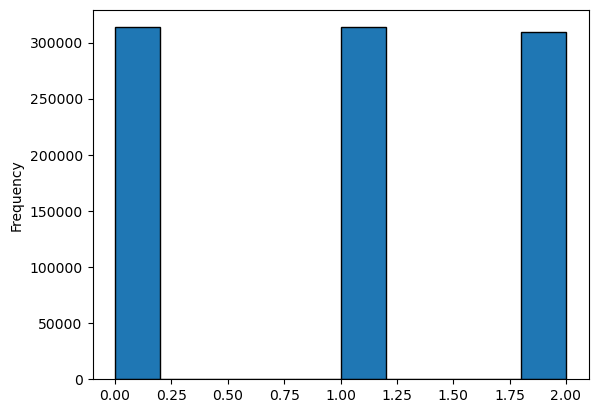

In [32]:
# distribution after cut
dfe['weight'].plot(kind='hist', edgecolor='black')

 - ## pieces

classes

In [33]:
dfe.groupby('town').size()/dfe['town'].count()

town
4.387104     0.012437
4.478456     0.011351
4.524851     0.010836
4.546261     0.010607
4.562292     0.010438
               ...   
10.659037    0.000023
10.805641    0.000020
10.859708    0.000019
12.363786    0.000004
13.056933    0.000002
Length: 251, dtype: float64

In [34]:
dfe['pieces'].describe()

count      936664
unique         32
top       unknown
freq       332425
Name: pieces, dtype: object

In [35]:
# changing "unknown" to 1 because every product is atleast 1 piece
dfe.loc[dfe["pieces"] == "unknown", "pieces"] = 1

In [36]:
dfe['pieces'] = pd.to_numeric(dfe['pieces'])

In [37]:
# current distribution
dfe.groupby('pieces').size()/dfe['pieces'].count()

pieces
1.0      0.452920
2.0      0.151866
3.0      0.073377
4.0      0.085791
5.0      0.002216
6.0      0.078758
7.0      0.000038
8.0      0.054326
9.0      0.000002
10.0     0.060013
11.0     0.000115
12.0     0.002664
14.0     0.003176
15.0     0.004216
16.0     0.000302
18.0     0.004800
20.0     0.011855
21.0     0.000781
22.0     0.001486
24.0     0.000147
25.0     0.000001
27.0     0.000001
30.0     0.007285
32.0     0.000001
33.0     0.003477
36.0     0.000001
40.0     0.000249
43.0     0.000002
50.0     0.000096
104.0    0.000002
200.0    0.000033
dtype: float64

In [38]:
dfi = dfe.copy()

1-1: 45%\
2+: 55%\

In [39]:
# technical limitations mean we have to set the limits by hand
bins = pd.IntervalIndex.from_tuples([(-1, 1.5), (1.6, 201)])
labels = ['1', '2']
# dfi['pieces'] = pd.cut(dfi['pieces'], bins, labels=['0', '1', '2']) not working bc of bug lol

# fix by user anky at https://stackoverflow.com/questions/60846442/python-pandas-cut-labels-are-ignored
dfi['pieces']  = dfi['pieces'].map(dict(zip(bins,labels)))

<AxesSubplot:ylabel='Frequency'>

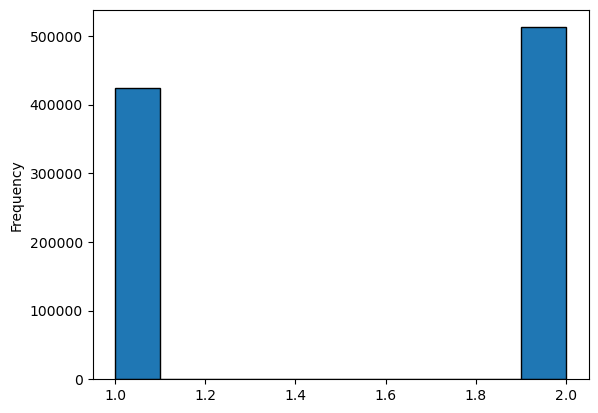

In [40]:
# distribution isn't perfect but usable
dfi['pieces'] = pd.to_numeric(dfi['pieces'])
dfi['pieces'].plot(kind='hist', edgecolor='black')

 - ## target

create + stats

In [ ]:
create_target(dfi)

In [41]:
dfi.groupby('target').size()/dfi['target'].count()

target
0.0    0.53445
1.0    0.46555
dtype: float64

- ## client_id

delete for scenarios 5,6
keep for 7

In [10]:
df56 = dfi.drop(columns=['client_id'])

# create scenarios and save to csv area

drop all null values\
how did they even get here

In [43]:
dfina56 = dfi56.dropna()
dfina7 = dfi.dropna()

### scenario 4
numerical data + weight

### scenario 5
numerical variables + IDs

### scenario 6
categorical variables

In [45]:
dfina56.to_csv('dados/06-categoricas.csv',index=False)

### scenario 7
top 1000 clients

In [ ]:
n = 10000
top_clients = df['client_id'].value_counts()[:n].index.tolist()
df = df.loc[df['client_id'].isin(top_clients)]

In [ ]:
dfina7.to_csv('dados/07-top-clients.csv',index=False)